### Problem statement:
dataset: (row 1_time k = row 2_time k-1 = row 3_time k-2)
TASK: build 2 models (The inputs are without n_k, try and add it to see its contribution?)：
 1. Black-box inverter model: (model of ideal inverter: u_x_k-1= d_x_k-2 * u_dc_k-2)
 - inputs: d_a/b/c_k-3, d_a/b/c_k-2, i_a/b/c_k-1, i_a/b/c_k, u_dc_k-1,u_dc_k,
 - targets: u_a/b/c_k-1
 2. Black-box inverter compensation scheme:
 - inputs: u_a/b/c_k-1, d_a/b/c_k-3, i_a/b/c_k-3, i_a/b/c_k-2, u_dc_k-3, u_dc_k-2,
 - targets: d_a/b/c_k-2

## Data Preprocessing & Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/inverter/Inverter Data Set.csv')
df.shape

(234527, 26)

In [4]:
df.head()

,n_k,u_dc_k,u_dc_k-1,u_dc_k-2,u_dc_k-3,i_a_k,i_b_k,i_c_k,i_a_k-1,i_b_k-1,...,i_c_k-3,d_a_k-2,d_b_k-2,d_c_k-2,d_a_k-3,d_b_k-3,d_c_k-3,u_a_k-1,u_b_k-1,u_c_k-1
0,3001.406296,567.985297,567.689956,567.431534,567.948379,2.461991,-1.792057,-0.716639,2.729208,-2.098439,...,-0.613965,0.667181,0.874633,0.125367,0.706206,0.862754,0.137246,360.541201,510.640963,82.471117
1,3001.468250,567.911462,567.985297,567.689956,567.431534,2.292110,-1.556948,-0.757338,2.461991,-1.792057,...,-0.758263,0.642184,0.880046,0.119954,0.667181,0.874633,0.125367,346.410081,513.190083,79.729357
2,3001.527815,567.911462,567.911462,567.985297,567.689956,2.155288,-1.332946,-0.840587,2.292110,-1.556948,...,-0.698139,0.611911,0.884307,0.115693,0.642184,0.880046,0.119954,329.440240,515.804643,77.924637
3,3001.585080,567.653039,567.911462,567.911462,567.985297,2.048768,-1.135788,-0.925686,2.155288,-1.332946,...,-0.716639,0.578149,0.888915,0.111085,0.611911,0.884307,0.115693,311.058880,517.537603,75.478717
4,3001.640131,567.579204,567.653039,567.911462,567.911462,1.952350,-0.918266,-1.027434,2.048768,-1.135788,...,-0.757338,0.541979,0.892123,0.107877,0.578149,0.888915,0.111085,290.481760,519.138403,73.580077


In [17]:
pd.options.display.max_rows = 100
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234527 entries, 0 to 234526
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   n_k       234527 non-null  float64
 1   u_dc_k    234527 non-null  float64
 2   u_dc_k-1  234527 non-null  float64
 3   u_dc_k-2  234527 non-null  float64
 4   u_dc_k-3  234527 non-null  float64
 5   i_a_k     234527 non-null  float64
 6   i_b_k     234527 non-null  float64
 7   i_c_k     234527 non-null  float64
 8   i_a_k-1   234527 non-null  float64
 9   i_b_k-1   234527 non-null  float64
 10  i_c_k-1   234527 non-null  float64
 11  i_a_k-2   234527 non-null  float64
 12  i_b_k-2   234527 non-null  float64
 13  i_c_k-2   234527 non-null  float64
 14  i_a_k-3   234527 non-null  float64
 15  i_b_k-3   234527 non-null  float64
 16  i_c_k-3   234527 non-null  float64
 17  d_a_k-2   234527 non-null  float64
 18  d_b_k-2   234527 non-null  float64
 19  d_c_k-2   234527 non-null  float64
 20  d_a_

In [18]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100*mis_val/len(df) 
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns=mis_val_table.rename(
    columns = {0: 'Missing Values', 1: '% of total values'})
    mis_val_table_ren_columns =mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of total values',ascending=False).round(1)
    print('your selected has' +str(df.shape[1])+'columns.\n' 'there are' + str(mis_val_table_ren_columns.shape[0])+ ' columns that have missing values')
    
    return mis_val_table_ren_columns

In [19]:
df_misstb = missing_values_table(df)

your selected has26columns.
there are0 columns that have missing values


In [20]:
df.shape

(234527, 26)

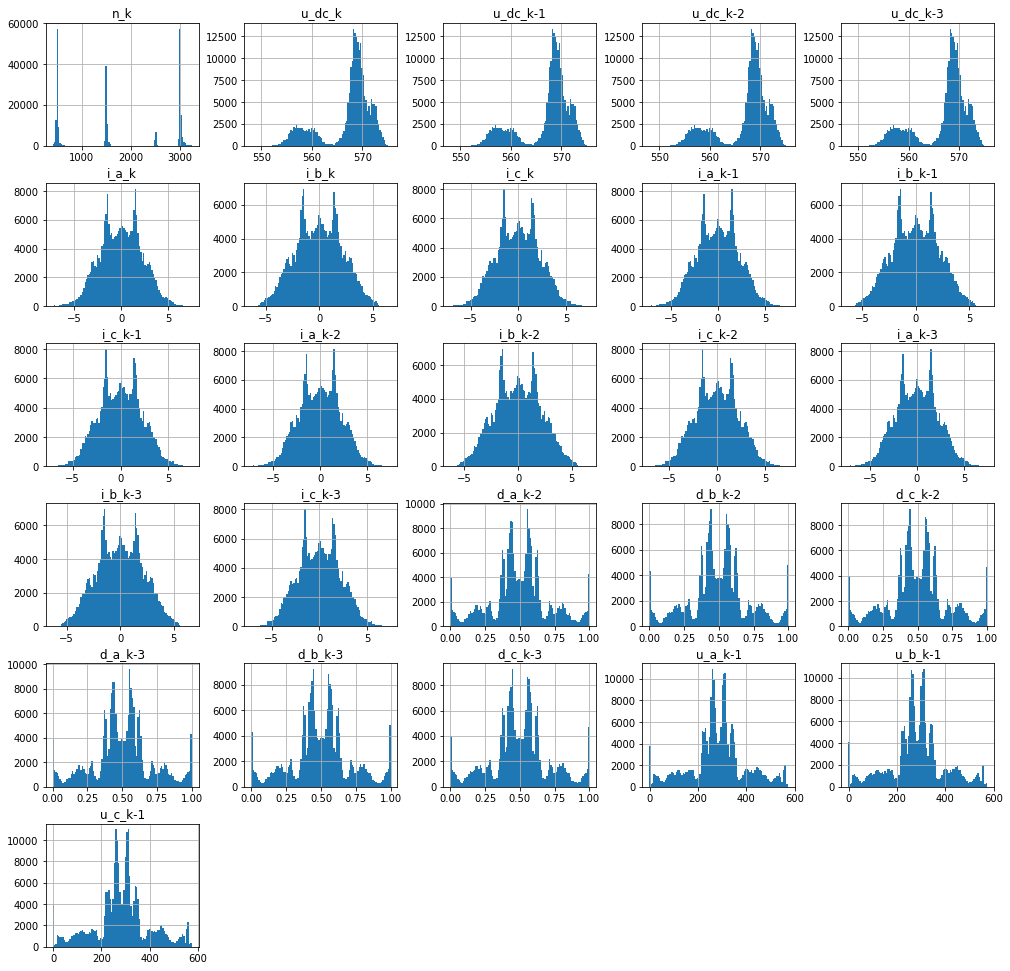

In [23]:
df.hist(figsize=(17,17), bins=100)
plt.show()

In [24]:
df['n_k'].describe()

count    234527.000000
mean       1728.414990
std        1084.463934
min         404.433935
25%         507.572918
50%        1501.516456
75%        2996.851500
max        3231.756077
Name: n_k, dtype: float64

### EDA -Correlation Coefficients:  between columns + between features and targets

C:\Users\jidhu\AppData\Local\Temp\ipykernel_15616\2390102904.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


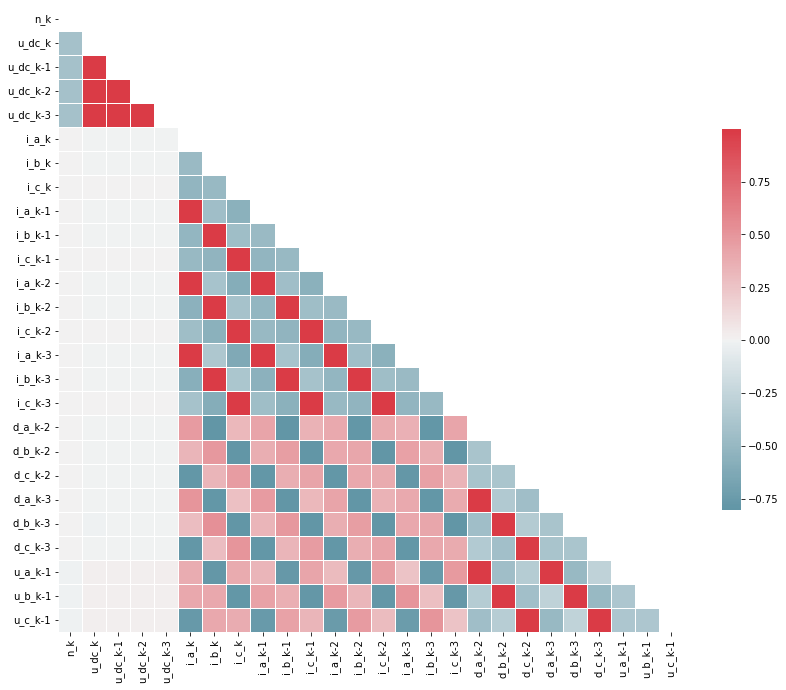

In [25]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(14,14))
_ = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})

In [23]:
# (target)
targets = ['u_a_k-1','u_b_k-1','u_c_k-1']
for i in targets:
    df_corr = df.corr()[i].sort_values()

    # print the strongest correlation coefficients(positive & negative)
    print('strongest positive correlations with target: \n', df_corr.tail(8))
    print('strongest negative correlations with target: \n', df_corr.head(8))

strongest positive correlations with target: 
 i_a_k      0.375554
i_c_k      0.381857
i_c_k-1    0.416999
i_c_k-2    0.450526
i_c_k-3    0.482292
d_a_k-3    0.986534
d_a_k-2    0.993402
u_a_k-1    1.000000
Name: u_a_k-1, dtype: float64
strongest negative correlations with target: 
 i_b_k     -0.776911
i_b_k-1   -0.773716
i_b_k-2   -0.768008
i_b_k-3   -0.759845
d_b_k-3   -0.495763
d_b_k-2   -0.450354
u_b_k-1   -0.379312
u_c_k-1   -0.376352
Name: u_a_k-1, dtype: float64
strongest positive correlations with target: 
 i_a_k      0.395191
i_b_k      0.398484
i_a_k-1    0.431479
i_a_k-2    0.466206
i_a_k-3    0.499197
d_b_k-3    0.986266
d_b_k-2    0.993273
u_b_k-1    1.000000
Name: u_b_k-1, dtype: float64
strongest negative correlations with target: 
 i_c_k     -0.781295
i_c_k-1   -0.779479
i_c_k-2   -0.775094
i_c_k-3   -0.768149
d_c_k-3   -0.486740
d_c_k-2   -0.441071
u_a_k-1   -0.379312
u_c_k-1   -0.373547
Name: u_b_k-1, dtype: float64
strongest positive correlations with target: 
 i_c_k

### Visualization
#### Features in Phase a (head 5000 samples)

Text(0, 0.5, 'Speed')

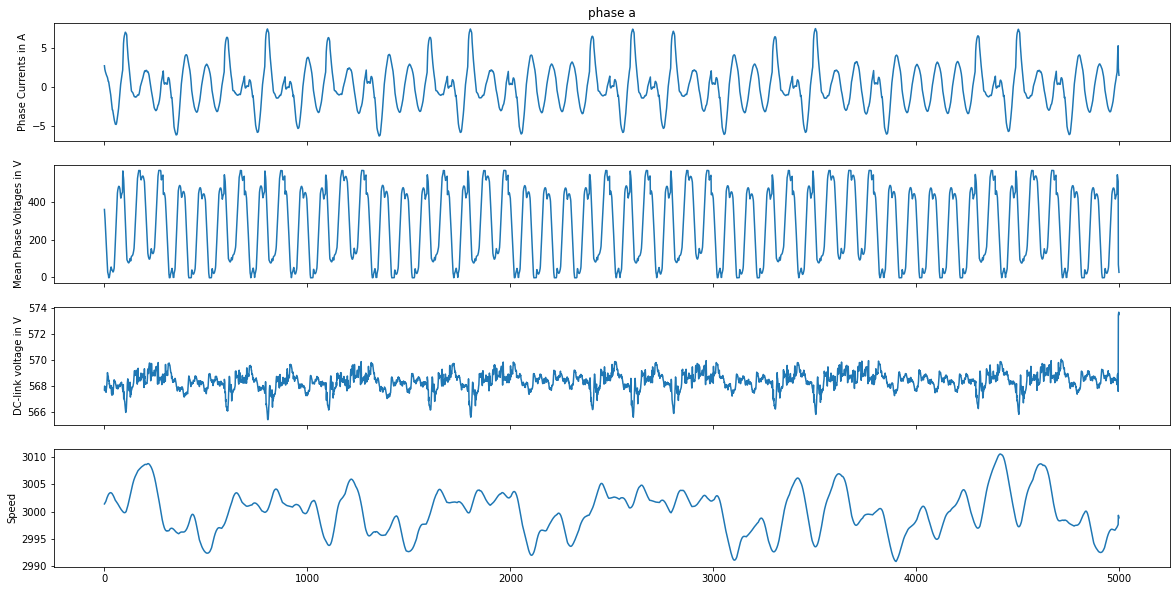

In [26]:
# phase
# 2500 samples/switch
p_sample= 5000

col_iak1=df['i_a_k-1'].head(p_sample)
p_iak1 = plt.subplot(4,1,1)
col_iak1.plot(use_index = True, figsize = (20,10), title='phase a')
plt.setp(p_iak1.get_xticklabels(), visible=False)
p_iak1.set_ylabel('Phase Currents in A')

col_uak1 = df['u_a_k-1'].head(p_sample)
p_uak1 = plt.subplot(4,1,2)
col_uak1.plot(use_index = True)
plt.setp(p_uak1.get_xticklabels(), visible=False)
p_uak1.set_ylabel('Mean Phase Voltages in V')

col_udck1 = df['u_dc_k-1'].head(p_sample)
p_udck1 = plt.subplot(4,1,3)
col_udck1.plot(use_index = True)
plt.setp(p_udck1.get_xticklabels(), visible=False)
p_udck1.set_ylabel('DC-link voltage in V')

col_nk = df['n_k'].head(p_sample)
p_nk = plt.subplot(4,1,4)
col_nk.plot(use_index = True)
p_nk.set_ylabel('Speed')

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

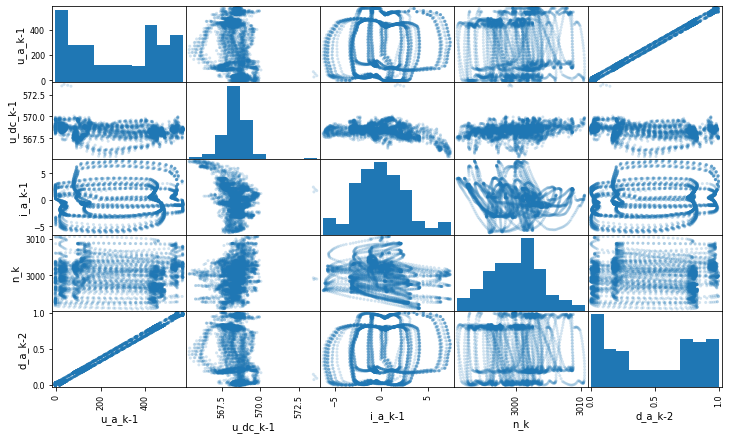

In [31]:
# u, udc, n, d, i 
p_5 = df[['u_a_k-1','u_dc_k-1','i_a_k-1','n_k','d_a_k-2']].head(5000)
pd.plotting.scatter_matrix(p_5, figsize=(12,7), alpha=0.2)
plt.show()

### Feature Engineering
domain knowledge...

## Model 1: Inverter Model 
#### Defined: Supervised - Regression problem
#### 0. Ideal model(Baseline) 1. Neural Network; 2. Random Forest

### Standardization

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
# Data Cutting
dfx1 = df[['i_a_k','i_a_k-1','i_b_k','i_b_k-1','i_c_k','i_c_k-1','u_dc_k','u_dc_k-1','d_a_k-2','d_a_k-3','d_b_k-2','d_b_k-3','d_c_k-2','d_c_k-3']]
dfy1 = df[['u_a_k-1','u_b_k-1','u_c_k-1','u_dc_k-2']]

In [34]:
# dfx1.shape
dfy1.shape

(234527, 4)

In [35]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(dfx1, dfy1, test_size = 0.2)
x_train1, x_val1, y_train1, y_val1 = train_test_split(x_train1, y_train1, test_size = 0.25)

In [32]:
print(x_train1.shape, x_val1.shape, x_test1.shape, y_train1.shape, y_val1.shape, y_test1.shape)

(140715, 14) (46906, 14) (46906, 14) (140715, 4) (46906, 4) (46906, 4)


In [36]:
# 3 targets y
y_tr1a = y_train1['u_a_k-1']
y_tr1b = y_train1['u_b_k-1']
y_tr1c = y_train1['u_c_k-1']

y_va1a = y_val1['u_a_k-1']
y_va1b = y_val1['u_b_k-1']
y_va1c = y_val1['u_c_k-1']

y_te1a = y_test1['u_a_k-1']
y_te1b = y_test1['u_b_k-1']
y_te1c = y_test1['u_c_k-1']

In [38]:
from sklearn import preprocessing

In [39]:
# Standardization
scaler = preprocessing.StandardScaler()

scaler.fit(x_train1)
x_train1_std = scaler.transform(x_train1)
x_val1_std = scaler.transform(x_val1)
x_test1_std = scaler.transform(x_test1)

In [40]:
print('mean of standardized test dataset', round(x_test1_std[:,5].mean()))
print('std of standardized test dataset', round(x_train1_std[:,8].std()))

mean of standardized test dataset 0
std of standardized test dataset 1


In [41]:
x_train1.columns

Index(['i_a_k', 'i_a_k-1', 'i_b_k', 'i_b_k-1', 'i_c_k', 'i_c_k-1', 'u_dc_k',
       'u_dc_k-1', 'd_a_k-2', 'd_a_k-3', 'd_b_k-2', 'd_b_k-3', 'd_c_k-2',
       'd_c_k-3'],
      dtype='object')

### 0. The Ideal Inverter Model : u_x_k-1 = d_x_k-2 * u_dc_k-2 (baseline)
(phase a)

In [42]:
# fix
df00 = pd.DataFrame(x_test1, columns = x_train1.columns)

In [43]:
df00['udc'] = y_test1['u_dc_k-2']

In [44]:
df00

,i_a_k,i_a_k-1,i_b_k,i_b_k-1,i_c_k,i_c_k-1,u_dc_k,u_dc_k-1,d_a_k-2,d_a_k-3,d_b_k-2,d_b_k-3,d_c_k-2,d_c_k-3,udc
179756,1.612590,1.627282,0.003658,-0.043549,-1.633299,-1.609250,568.908235,569.055905,0.584691,0.591331,0.616183,0.614608,0.383817,0.385392,569.277411
24889,1.705335,1.397714,-3.784931,-4.162586,2.121217,2.802931,559.420428,559.531180,0.823533,0.830469,0.053670,0.029531,0.036467,0.046166,559.826521
222392,1.453729,1.200286,-3.774749,-3.736798,2.308064,2.513411,567.394616,566.545513,0.777502,0.774770,0.222498,0.225230,0.540357,0.571874,565.954832
154273,0.779717,0.852261,1.012591,0.959830,-1.805347,-1.805347,567.542286,567.542286,0.435426,0.441975,0.623485,0.624928,0.376515,0.375072,567.357699
218230,0.149783,0.334356,2.476932,2.336237,-2.644309,-2.707208,570.569524,569.978844,0.335428,0.361085,0.724652,0.730865,0.275348,0.269135,569.535833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152010,-1.488413,-1.493923,0.553480,0.613646,0.901161,0.852137,568.132967,567.948379,0.451856,0.445862,0.387398,0.387841,0.612602,0.612159,567.763791
162809,-1.752875,-1.609625,4.205076,4.181936,-2.471336,-2.605459,567.579204,566.693183,0.332119,0.332600,0.667881,0.667400,0.465848,0.456028,565.807162
228049,2.458318,2.431688,-1.515295,-1.630998,-0.943260,-0.812837,572.489236,572.599989,0.682128,0.704726,0.758078,0.752443,0.241922,0.247557,572.415401
144436,-2.768483,-2.772157,-0.149070,-0.124078,2.863055,2.853805,568.502142,568.539060,0.474368,0.472722,0.417411,0.417982,0.582589,0.582018,568.649812


In [45]:
df00['pred00'] = df00['d_a_k-2']*df00['udc']

In [46]:
df00['true'] = pd.DataFrame(y_te1a)

In [47]:
from sklearn.metrics import mean_squared_error

mse1a = mean_squared_error(df00['true'] , df00['pred00'])
mse1a

197.95355438479348

### 1. Neural Network
#### To Be Continued: try different units (10/20/30/40/50) and more hidden layers(2/3/4)

#### Build a Neural Network: 3 Layers

In [50]:
from keras import models
from keras import layers
# nn1: 1 hidden layer
nn1 = models.Sequential()
nn1.add(layers.Dense(units=30, activation = 'relu', input_shape =(14,)))
nn1.add(layers.Dense(units=30, activation = 'relu'))
nn1.add(layers.Dense(units=1))
nn1.compile(loss='mse', optimizer='Adam', metrics=['mse'])

In [51]:
# nn2: k=5, u=3 (u=50: bad)
nn2 = models.Sequential()
nn2.add(layers.Dense(units=30, activation = 'relu', input_shape =(14,)))
nn2.add(layers.Dense(units=30, activation = 'relu'))
nn2.add(layers.Dense(units=30, activation = 'relu'))
nn2.add(layers.Dense(units=30, activation = 'relu'))
nn2.add(layers.Dense(units=30, activation = 'relu'))
nn2.add(layers.Dense(units=30, activation = 'relu'))
nn2.add(layers.Dense(units=1))
nn2.compile(loss='mse', optimizer='Adam', metrics=['mse'])

#### (1) 14features --> target1: u_a_k-1

In [52]:
nnfit1 = nn1.fit(x_train1_std, y_tr1a, 
                    epochs=30, batch_size=500,
                   validation_data=(x_val1_std, y_va1a))

Epoch 1/30
282/282 [==============================] - 1s 2ms/step - loss: 65188.7070 - mse: 65188.7070 - val_loss: 13465.7852 - val_mse: 13465.7852
Epoch 2/30
282/282 [==============================] - 1s 2ms/step - loss: 6910.0718 - mse: 6910.0718 - val_loss: 4944.9722 - val_mse: 4944.9722
Epoch 3/30
282/282 [==============================] - 0s 2ms/step - loss: 4058.3660 - mse: 4058.3660 - val_loss: 3352.6245 - val_mse: 3352.6245
Epoch 4/30
282/282 [==============================] - 0s 2ms/step - loss: 2732.4468 - mse: 2732.4468 - val_loss: 2213.6079 - val_mse: 2213.6084
Epoch 5/30
282/282 [==============================] - 1s 2ms/step - loss: 1682.2206 - mse: 1682.2206 - val_loss: 1226.5793 - val_mse: 1226.5793
Epoch 6/30
282/282 [==============================] - 0s 2ms/step - loss: 857.3707 - mse: 857.3707 - val_loss: 573.6577 - val_mse: 573.6577
Epoch 7/30
282/282 [==============================] - 0s 2ms/step - loss: 396.7664 - mse: 396.7664 - val_loss: 264.5257 - val_mse: 264.5

Text(0, 0.5, 'loss')

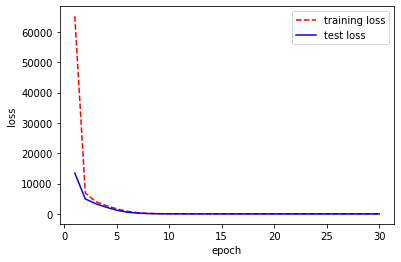

In [53]:
# Training history Visualization
tra_loss = nnfit1.history['loss']
te_loss = nnfit1.history['val_loss']

epoch_count = range(1, len(tra_loss)+1)
plt.plot(epoch_count, tra_loss,'r--')
plt.plot(epoch_count, te_loss, 'b-')

plt.legend(['training loss','test loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [54]:
# nn2:
nn2fit1 = nn2.fit(x_train1_std, y_tr1a, 
                    epochs=30, batch_size=500,
                   validation_data=(x_val1_std, y_va1a))

Epoch 1/30
282/282 [==============================] - 1s 2ms/step - loss: 28719.1016 - mse: 28719.1016 - val_loss: 2000.3527 - val_mse: 2000.3527
Epoch 2/30
282/282 [==============================] - 1s 2ms/step - loss: 516.5522 - mse: 516.5522 - val_loss: 93.9145 - val_mse: 93.9145
Epoch 3/30
282/282 [==============================] - 1s 3ms/step - loss: 60.8301 - mse: 60.8301 - val_loss: 42.5238 - val_mse: 42.5238
Epoch 4/30
282/282 [==============================] - 1s 3ms/step - loss: 33.5014 - mse: 33.5014 - val_loss: 28.1007 - val_mse: 28.1007
Epoch 5/30
282/282 [==============================] - 1s 3ms/step - loss: 23.7966 - mse: 23.7966 - val_loss: 20.6363 - val_mse: 20.6363
Epoch 6/30
282/282 [==============================] - 1s 2ms/step - loss: 18.3126 - mse: 18.3126 - val_loss: 16.4966 - val_mse: 16.4966
Epoch 7/30
282/282 [==============================] - 1s 2ms/step - loss: 14.6828 - mse: 14.6828 - val_loss: 13.0735 - val_mse: 13.0735
Epoch 8/30
282/282 [================

Text(0, 0.5, 'loss')

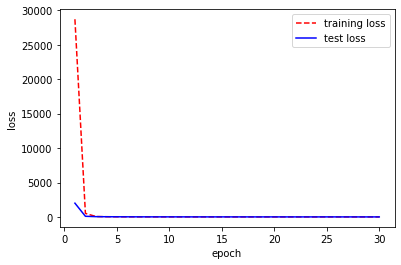

In [57]:
# Training history Visualization
tra_loss = nn2fit1.history['loss']
te_loss = nn2fit1.history['val_loss']

epoch_count = range(1, len(tra_loss)+1)
plt.plot(epoch_count, tra_loss,'r--')
plt.plot(epoch_count, te_loss, 'b-')

plt.legend(['training loss','test loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

#### (2) 14features --> target2: u_b_k-1

In [58]:
nnfit2 = nn2.fit(x_train1_std, y_tr1b, 
                    epochs=30, batch_size=500,
                   validation_data=(x_test1_std, y_te1b))

Epoch 1/30
282/282 [==============================] - 1s 3ms/step - loss: 795.4406 - mse: 795.4404 - val_loss: 48.3329 - val_mse: 48.3329
Epoch 2/30
282/282 [==============================] - 1s 2ms/step - loss: 35.3598 - mse: 35.3598 - val_loss: 26.6081 - val_mse: 26.6081
Epoch 3/30
282/282 [==============================] - 1s 2ms/step - loss: 22.5356 - mse: 22.5356 - val_loss: 19.7110 - val_mse: 19.7110
Epoch 4/30
282/282 [==============================] - 1s 2ms/step - loss: 17.2191 - mse: 17.2191 - val_loss: 15.9868 - val_mse: 15.9868
Epoch 5/30
282/282 [==============================] - 1s 2ms/step - loss: 14.6439 - mse: 14.6439 - val_loss: 13.8038 - val_mse: 13.8038
Epoch 6/30
282/282 [==============================] - 1s 3ms/step - loss: 12.8860 - mse: 12.8860 - val_loss: 12.6587 - val_mse: 12.6587
Epoch 7/30
282/282 [==============================] - 1s 2ms/step - loss: 11.4788 - mse: 11.4788 - val_loss: 10.9975 - val_mse: 10.9975
Epoch 8/30
282/282 [==========================

Text(0, 0.5, 'loss')

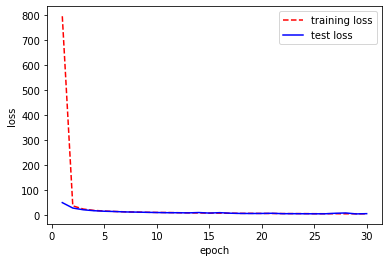

In [59]:
tra_loss2 = nnfit2.history['loss']
te_loss2 = nnfit2.history['val_loss']
epoch_count = range(1, len(tra_loss2)+1)
plt.plot(epoch_count, tra_loss2,'r--')
plt.plot(epoch_count, te_loss2, 'b-')

plt.legend(['training loss','test loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

#### (3) 14features --> target3: u_c_k-1

In [60]:
nnfit3 = nn2.fit(x_train1_std, y_tr1c, 
                    epochs=30, batch_size=500,
                   validation_data=(x_test1_std, y_te1c))

Epoch 1/30
282/282 [==============================] - 1s 2ms/step - loss: 824.4747 - mse: 824.4747 - val_loss: 36.7001 - val_mse: 36.7001
Epoch 2/30
282/282 [==============================] - 1s 2ms/step - loss: 26.9020 - mse: 26.9020 - val_loss: 21.3114 - val_mse: 21.3114
Epoch 3/30
282/282 [==============================] - 1s 2ms/step - loss: 18.7547 - mse: 18.7547 - val_loss: 16.9011 - val_mse: 16.9011
Epoch 4/30
282/282 [==============================] - 1s 2ms/step - loss: 14.7824 - mse: 14.7824 - val_loss: 13.9592 - val_mse: 13.9592
Epoch 5/30
282/282 [==============================] - 1s 2ms/step - loss: 12.3317 - mse: 12.3317 - val_loss: 11.2251 - val_mse: 11.2251
Epoch 6/30
282/282 [==============================] - 1s 3ms/step - loss: 10.5325 - mse: 10.5325 - val_loss: 10.3343 - val_mse: 10.3343
Epoch 7/30
282/282 [==============================] - 1s 2ms/step - loss: 9.4352 - mse: 9.4352 - val_loss: 12.9067 - val_mse: 12.9067
Epoch 8/30
282/282 [============================

Text(0, 0.5, 'loss')

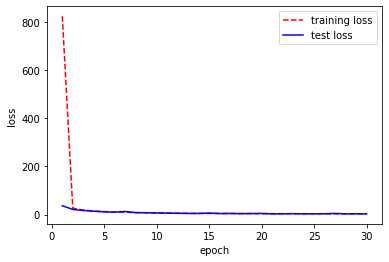

In [61]:
tra_loss3 = nnfit3.history['loss']
te_loss3 = nnfit3.history['val_loss']
epoch_count = range(1, len(tra_loss3)+1)
plt.plot(epoch_count, tra_loss3,'r--')
plt.plot(epoch_count, te_loss3, 'b-')

plt.legend(['training loss','test loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

### 2. RandomForest
#### 14 features --> target: u_a_k-1

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
# time: 4m50s
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train1_std, y_tr1a)

RandomForestRegressor()

In [99]:
rfrpred = rfr.predict(x_test1_std)

In [100]:
from sklearn.metrics import mean_squared_error
mserfr = mean_squared_error(y_te1a, rfrpred)
mserfr

0.4852653337802118

In [105]:
y_te1a

62822     274.583760
205826    324.041840
44276     275.226480
154175    335.441281
11239     418.525282
             ...    
140406    292.250720
215858    397.795921
102505    301.607760
170535    234.119359
126221    316.399760
Name: u_a_k-1, Length: 46906, dtype: float64

In [106]:
rfrpred

array([274.60271322, 323.45178396, 275.04425842, ..., 301.17065529,
       234.92256623, 316.03753294])

In [101]:
feat_importance = rfr.feature_importances_

In [102]:
x_colname = list(x_train1.columns)

In [103]:
feat_impor_df = pd.DataFrame({'feature': x_colname, 'importance': feat_importance})

In [104]:
feat_impor_df.sort_values('importance', ascending=False)

,feature,importance
8,d_a_k-2,0.989129
1,i_a_k-1,0.003496
10,d_b_k-2,0.003260
0,i_a_k,0.001604
11,d_b_k-3,0.001289
13,d_c_k-3,0.000285
5,i_c_k-1,0.000259
7,u_dc_k-1,0.000161
6,u_dc_k,0.000136
9,d_a_k-3,0.000126


## Model 2: Inverter Compensation Scheme
#### Defined: Supervised - Regression problem

### Preprocessing: Dataset cutting + Standadization

In [107]:
# cutting dataset
dfx2 = df[['u_a_k-1','u_b_k-1','u_c_k-1','d_a_k-3','d_b_k-3','d_c_k-3','i_a_k-3','i_b_k-3','i_c_k-3','i_a_k-2','i_b_k-2','i_c_k-2','u_dc_k-3','u_dc_k-2']]
dfy2 = df[['d_a_k-2','d_b_k-2','d_c_k-2']]
x_train2, x_test2, y_train2, y_test2 = train_test_split(dfx2, dfy2, test_size = 0.3)

In [ ]:
# x_train2, x_test2, y_train2, y_test2 = train_test_split(dfx2, dfy2, test_size = 0.2)
# x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train2, y_train2, test_size = 0.25)

In [108]:
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

(164168, 14) (70359, 14) (164168, 3) (70359, 3)


In [109]:
# 3 targets y
y_tr2a = y_train2['d_a_k-2']
y_tr2b = y_train2['d_b_k-2']
y_tr2c = y_train2['d_c_k-2']

# y_va1a = y_val1['u_a_k-1']
# y_va1b = y_val1['u_b_k-1']
# y_va1c = y_val1['u_c_k-1']

y_te2a = y_test2['d_a_k-2']
y_te2b = y_test2['d_b_k-2']
y_te2c = y_test2['d_c_k-2']

In [110]:
# Standardization
scaler2 = preprocessing.StandardScaler()

scaler2.fit(x_train2)
x_train2_std = scaler2.transform(x_train2)
# x_val2_std = scaler2.transform(x_val2)
x_test2_std = scaler2.transform(x_test2)

In [111]:
print('mean of standardized test dataset', round(x_test2_std[:,5].mean()))
print('std of standardized test dataset', round(x_train2_std[:,8].std()))

mean of standardized test dataset 0.0
std of standardized test dataset 1.0


### 1. Neural Network
#### To Be Continued: try different units (10/20/30/40/50) & k (1/2/3)

#### 1. 14 features --> target 1: d_a_k-2

In [154]:
nnfit2a = nn2.fit(x_train2_std, y_tr2a,
                  epochs=30, batch_size=300,
                   validation_data=(x_test2_std, y_te2a))

Epoch 1/30
548/548 [==============================] - 1s 2ms/step - loss: 506.0375 - mse: 506.0375 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2/30
548/548 [==============================] - 1s 2ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 3/30
548/548 [==============================] - 1s 2ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 4/30
548/548 [==============================] - 1s 2ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 5/30
548/548 [==============================] - 1s 2ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 6/30
548/548 [==============================] - 1s 2ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 7/30
548/548 [==============================] - 1s 2ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 8/30
548/548 [==============================] - 1s 2ms/step - loss

Text(0, 0.5, 'loss')

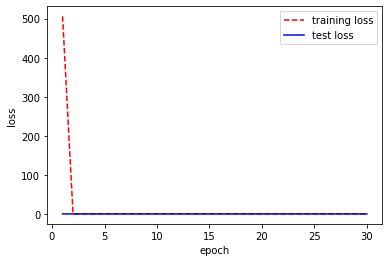

In [155]:
tra_loss2a = nnfit2a.history['loss']
te_loss2a = nnfit2a.history['val_loss']
epoch_count = range(1, len(tra_loss2a)+1)
plt.plot(epoch_count, tra_loss2a,'r--')
plt.plot(epoch_count, te_loss2a, 'b-')

plt.legend(['training loss','test loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

#### 2. 14 features --> target 2: d_b_k-2 

Epoch 1/30
548/548 [==============================] - 1s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 6.0108e-04 - val_mse: 6.0108e-04
Epoch 2/30
548/548 [==============================] - 1s 2ms/step - loss: 3.7134e-04 - mse: 3.7134e-04 - val_loss: 2.4888e-04 - val_mse: 2.4888e-04
Epoch 3/30
548/548 [==============================] - 1s 2ms/step - loss: 3.4644e-04 - mse: 3.4644e-04 - val_loss: 3.0814e-04 - val_mse: 3.0814e-04
Epoch 4/30
548/548 [==============================] - 1s 2ms/step - loss: 3.1591e-04 - mse: 3.1591e-04 - val_loss: 2.1931e-04 - val_mse: 2.1931e-04
Epoch 5/30
548/548 [==============================] - 1s 2ms/step - loss: 2.6992e-04 - mse: 2.6992e-04 - val_loss: 1.2922e-04 - val_mse: 1.2922e-04
Epoch 6/30
548/548 [==============================] - 1s 2ms/step - loss: 2.1109e-04 - mse: 2.1109e-04 - val_loss: 1.2616e-04 - val_mse: 1.2616e-04
Epoch 7/30
548/548 [==============================] - 1s 2ms/step - loss: 1.9839e-04 - mse: 1.9839e-04 - val_loss: 1.943

Text(0, 0.5, 'loss')

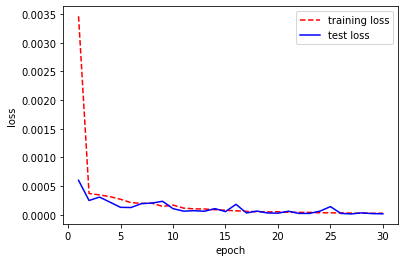

In [156]:
nnfit2b = nn2.fit(x_train2_std, y_tr2b,
                  epochs=30, batch_size=300,
                   validation_data=(x_test2_std, y_te2b))
# loss
tra_loss2b = nnfit2b.history['loss']
te_loss2b = nnfit2b.history['val_loss']
epoch_count = range(1, len(tra_loss2b)+1)
plt.plot(epoch_count, tra_loss2b,'r--')
plt.plot(epoch_count, te_loss2b, 'b-')

plt.legend(['training loss','test loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

**3. 14 features --> target 3: d_c_k-2**

Epoch 1/30
548/548 [==============================] - 1s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 8.5109e-05 - val_mse: 8.5109e-05
Epoch 2/30
548/548 [==============================] - 1s 2ms/step - loss: 9.2583e-05 - mse: 9.2583e-05 - val_loss: 5.3340e-05 - val_mse: 5.3340e-05
Epoch 3/30
548/548 [==============================] - 1s 2ms/step - loss: 7.2060e-05 - mse: 7.2060e-05 - val_loss: 3.4637e-05 - val_mse: 3.4637e-05
Epoch 4/30
548/548 [==============================] - 1s 2ms/step - loss: 6.8229e-05 - mse: 6.8229e-05 - val_loss: 3.1767e-05 - val_mse: 3.1767e-05
Epoch 5/30
548/548 [==============================] - 1s 2ms/step - loss: 6.0056e-05 - mse: 6.0056e-05 - val_loss: 2.9791e-05 - val_mse: 2.9791e-05
Epoch 6/30
548/548 [==============================] - 1s 2ms/step - loss: 5.5016e-05 - mse: 5.5016e-05 - val_loss: 9.1273e-05 - val_mse: 9.1273e-05
Epoch 7/30
548/548 [==============================] - 1s 2ms/step - loss: 5.0742e-05 - mse: 5.0742e-05 - val_loss: 2.018

Text(0, 0.5, 'loss')

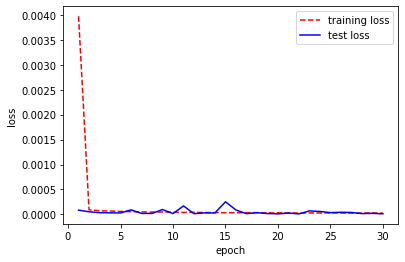

In [157]:
nnfit2c = nn2.fit(x_train2_std, y_tr2c,
                  epochs=30, batch_size=300,
                   validation_data=(x_test2_std, y_te2c))
tra_loss2c = nnfit2c.history['loss']
te_loss2c = nnfit2c.history['val_loss']
epoch_count = range(1, len(tra_loss2c)+1)
plt.plot(epoch_count, tra_loss2c,'r--')
plt.plot(epoch_count, te_loss2c, 'b-')

plt.legend(['training loss','test loss'])
plt.xlabel('epoch')
plt.ylabel('loss')